In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Моменты предъявления клиентами требований на страховые выплаты образует 

неоднородный Пуассоновский процесс с интенствностью $ \lambda(t) = e^{0.1 t} - 1 $

Тогда интегральная интенсивность $ \Lambda(t) = \int_{0}^{t} \lambda(x) dx $

$ \Lambda(t) = \int_{0}^{t} (e^{0.1 x} - 1) dx  = 10 e^{0.1 x} - t - 10 $

Зададим эту функцию:

In [0]:
def Lambda(t):
    return 10 * np.exp(0.1 * t) - t - 10 

Зададим вспомогательную функцию, которая генерирует реализацию с.в. с 

экспоненциальным распределением с параметром $ \mu $.

Воспользуемся формулой моделирования, полученной с помощью метода

обратных функций: $ \xi^{Mod} = - \cfrac{ln(\gamma)}{\mu}$, где $\gamma \sim R[0, 1] $ 


In [0]:
def GenExp(l):
    gamma = np.random.uniform(0, 1)
    return -np.log(gamma) / l

Далее воспользуемся алгоритмом оценки вероятности разорения для

процесса риска с неоднородным пуассоновским процессом исков на $ [0, T] $. 

$ \psi_T(S) = P_{t \in [0, T]}\{{inf} \ Y_t< 0\}$ - вероятность разорения,

$Y_t = S + (1 + \alpha){EN(t)} {EX_i^0} - \sum_{i=1}^{N(t)}X_i^0$ - текущий капитал страховой

компании

$S$ - начальный капитал. $S = 50, 150$.

$N(t)$ - неоднородный пуассоновский процесс исков на выплаты с

интенствностью $ \lambda(t) = e^{0.1 t} - 1 $

$X_i^0$ н.о.р.с.в. с экспоненциальным распределением с параметром $\mu = 0.2$

$\alpha$ - коэффициент нагрузки. $\alpha = 0.15$

Рассмотрим классический процесс риска:

$Y_t^0 = S + (1 + \alpha){EN^0(t)} {EX_i^0} - \sum_{i=1}^{N^0(t)}X_i^0,$ где $N^0(t)$ - однородный

пуассоновский процесс с $\lambda = 1, \Lambda(t) = \int_{0}^{t} \lambda(x) dx $

Тогда $ \psi_T(S) = P_{t \in [0, \Lambda(T)]}\{{inf} \ Y_t^0< 0\} = \psi_{\Lambda(T)}^0(S)$

In [0]:
def GenTrace(S, alpha, T, mu):
    History_C = []
    History_T = []
    Ind = 0
    EX = 1 / mu
    c = (1 + alpha) * 1 * EX
    C = S
    Lambda_T = Lambda(T)
    T_0 = 0
    History_C.append(C)
    History_T.append(T_0)
    t = GenExp(1)
    T_0 += t
    while T_0 < Lambda_T:
        X = GenExp(mu)
        History_C.append(C+c*t)
        History_T.append(T_0)
        C += c * t - X
        History_C.append(C)
        History_T.append(T_0)
        if C < 0:
            Ind = 1
            break
        t = GenExp(1)
        T_0 += t
    return Ind, History_C, History_T

Вычислим вероятность разорения по формуле $ \hat\psi_T(S) = \hat\psi_{\Lambda(T)}^0(S) = \frac{1}{N} \sum_{i=1}^{N} Ind_i$

Воспользуемся алгоритмом оценки с заданной абсолютной точностью $\epsilon = 0.01$ и

уровнем доверия $\beta = 0.9$.

По таблице выберем значение $x_\beta^0$ - решение уравнения $\Phi_0(x) = \beta$.

![alt text](http://scask.ru/htm/stu.sernam/book_stat2/1/434.gif)

$N_{min}$ - вычисляется по формуле $N_{min} = \cfrac{(x_\beta^0)^2 D\xi}{\epsilon ^2}$. 

Дисперсия оценивается по формуле $\hat D_N = \frac{1}{N} \sum_{i=1}^{N}\xi_i^2 - [\frac{1}{N} \sum_{i=1}^{N}\xi_i]^2$.

### 1) 50 ден. ед.

In [0]:
np.random.seed(42)
beta = 0.9
eps = 0.01
x_b = 1.3
i = 0
Sum = 0
N1 = 0
N2 = 1000
while N2 > N1:
    N1 = N2
    while i < N1:
        Ind, _, _ = GenTrace(50, 0.15, 730, 0.2)
        Sum += Ind
        i += 1   
    e = Sum / N1
    D = e - e**2
    N2 = (x_b**2) * D / eps**2

print(round(e,3), int(np.seil(N1)))

0.17 2384


### 2) 150 ден. ед.

In [0]:
np.random.seed(73)
beta = 0.9
eps = 0.01
x_b = 1.3
i = 0
Sum = 0
N1 = 0
N2 = 100
while N2 > N1:
    N1 = N2
    while i < N1:
        Ind, _, _ = GenTrace(150, 0.15, 730, 0.2)
        Sum += Ind
        i += 1   
    e = Sum / N1
    D = e - e**2
    N2 = (x_b**2) * D / eps**2

print(round(e,3), int(N1)+1)

0.006 168


Для наглядности изобразим несколько траекторий страховой компании.

0.1


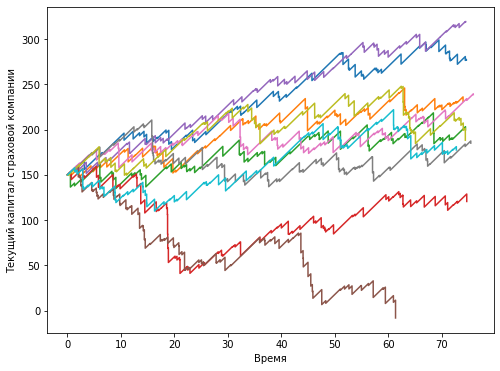

In [0]:
np.random.seed(42)
Sum = 0
N = 10
plt.figure(figsize=(8, 6))
plt.xlabel('Время')
plt.ylabel('Текущий капитал страховой компании')
for _ in range(N):
    Ind, H_C, H_T = GenTrace(150, 0.15, 24, 0.2)
    Sum += Ind
    plt.plot(H_T, H_C)
print(Sum / N)